# Breast Cancer with PCA & Decision Tree Classifier

In this project, we'll focus on scikit-learn's Breast Cancer dataset. 

The first task after loading the dataset will be performing Principal Component Analysis (PCA) which entails reducing the dimensions of the features (originally 30) to its principal components (normalized linear combinations of the original features). The main goals of PCA are to reduce the dimensions of the data and to help understand which features explain the most variance in the dataset.

We'll then use the principal components to train a Decison Tree Classifier that will classify tumors as either malignant or benign.

In [1]:
#importing the necessary libraries

import numpy as np
# linear algebra, scientific computing

import pandas as pd
# data processing, manipulation and analysis

import matplotlib.pyplot as plt
# data visualization

import seaborn as sns
# data visualization

In [2]:
# importing the dataset

from sklearn.datasets import load_breast_cancer

In [3]:
# creating a dictionary containing the data

breast_cancer=load_breast_cancer()

In [4]:
# checking out the keys of our dictionary

breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# let's check out a description of the data

print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# creating a dataframe containing the features only

df=pd.DataFrame(data=breast_cancer['data'],columns=breast_cancer['feature_names'])

In [7]:
# to check out the number of rows and columns in the data

df.shape

(569, 30)

The dataset has 569 observations and 30 features

In [8]:
# we check the first 5 rows to get a rough overview of the data

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# creating a variable with the target values

y=breast_cancer['target']

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
breast_cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [12]:
np.sum(y)

357

The target value for malignant tumors is 0 while that of the benign ones is 1 per the dataset description

In [13]:
#  checking the column data types and whether we have any null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Data cleaning is not necessary for this dataset and we won't be exploring the raw data.

#### So let's jump right into the reason why we are here.

In [14]:
# we have to scale our data

from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

# scaler is an instance of StandardScaler

In [16]:
X=scaler.fit_transform(df)

# our scaled features are now stored in the variable X

## principal component analysis

In [17]:
# importing PCA

from sklearn.decomposition import PCA

In [18]:
# creating an instance of PCA
# building an initiol model with 2 principal components

pca=PCA(n_components=2)

In [19]:
new_X=pca.fit_transform(X)

In [20]:
# checking how much variance is explained by each of the two components

pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [21]:
# to get the cumulative explained variance

np.sum(pca.explained_variance_ratio_)

0.6324320765155951

The two principal components explain over 63% of the variance in our data which is incredible considering the fact that we had 30 original features. 

it is important to remind ourselves that dimension reduction via PCA doesn't simply select a subset of the original features. It creates new components that are normalized linear combinations of proportions of the original features.

#### Visualizing the 2 principal components and the two classes

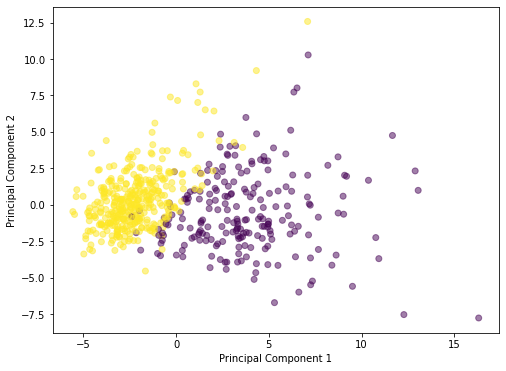

In [22]:
# creating a scatterplot of the 2 principal components colored by the target value

plt.figure(figsize=(8,6))
plt.scatter(x=new_X[:,0],y=new_X[:,1],c=y,alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2');

We can still separate the classes quite clearly even though the two principal components account for slightly more than 63% of the variance in the dataset.

#### Building a Decision Tree Classifier with the 2 components

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# splitting the principal components and the target value into train and test sets for the Decisoon Tree classifier

X_train, X_test, y_train, y_test = train_test_split(new_X,y, test_size=0.3, random_state=101)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc=DecisionTreeClassifier()

In [27]:
from sklearn.model_selection import GridSearchCV

# we are going to perform a grid search to find the best parameters

In [28]:
param_grid={'criterion':["gini", "entropy"],
           'splitter':["best", "random"],
           'max_features':["auto", "sqrt", "log2"]}

In [29]:
# an instance of grid search

grid_model=GridSearchCV(estimator=dtc,param_grid=param_grid)

In [30]:
# fitting to the training data

grid_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [31]:
# below are the best parameters after performing the grid search

grid_model.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'best'}

In [32]:
# predicting from the test data

y_preds=grid_model.predict(X_test)

#### Model evaluation

In [33]:
# importing the evaluation metrics

from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [34]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        66
           1       0.85      0.89      0.87       105

    accuracy                           0.83       171
   macro avg       0.82      0.81      0.82       171
weighted avg       0.83      0.83      0.83       171



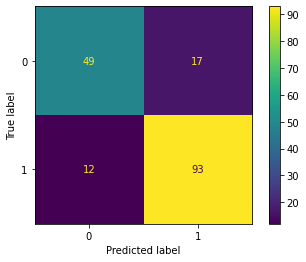

In [35]:
plot_confusion_matrix(grid_model,X_test,y_test)

A Decision Tree trained with two principal components misclassifies 29 points and results in decent model accuracy of 83%.

#### Finding the 'optimum' number of components

In [36]:
# creating a for loop with a range of n values in an attempt to determine the optimum number of components
# we go up to 30 since we have 30 features
# with a feature space having 30 dimensions, 30 principal components should therefore explain 100% of the variance

explained_variance=[]

for n in range(1,30):
    pca2=PCA(n_components=n)
    pca2.fit_transform(X)
    
    explained_variance.append(np.sum(pca2.explained_variance_ratio_))

Text(0, 0.5, 'Explained Variance Ratio')

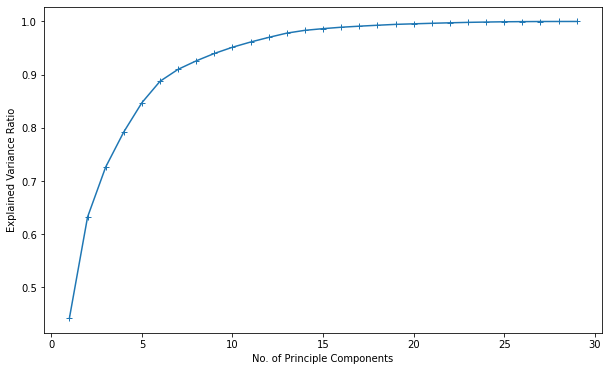

In [37]:
# plotting the results of the loop

plt.figure(figsize=(10,6))
plt.plot(range(1,30),explained_variance,marker='+')
plt.xlabel('No. of Principle Components')
plt.ylabel('Explained Variance Ratio')

Increasing the number of components increases the variance explained. 
From the results above, 10 seems like a decent number of components. 
Increasing the number of components beyond 10 doesn't really add that much more expained variance.

#### 10 principal components

In [38]:
# now we build our model with the 10 principal components

pca3=PCA(n_components=10)

In [39]:
final_X=pca3.fit_transform(X)

In [40]:
final_X

array([[ 9.19283683,  1.94858307, -1.12316617, ..., -0.39840663,
        -0.15711797, -0.87740206],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098926,
        -0.71190429,  1.106996  ],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737384,
         0.02406272,  0.45427259],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188731,
         0.3939155 ,  0.52087581],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023902,
        -0.54203422, -0.08929746],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635463,
         0.37410263, -0.04772404]])

In [41]:
# the variance explained by each of the 10 components individually

pca3.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [42]:
# the total variance eplained by all 10 components together

np.sum(pca3.explained_variance_ratio_)

0.9515688143362468

Given that the 30 original features explain 100% of the variance, 10 principal components accounting for 95% of the variance is impressive.

In [43]:
# building a dataframe of the 10 principal components and their explained variance

pca3_df=pd.DataFrame(data=pca3.explained_variance_ratio_,columns=['Explained Variance Ratio'],
                    index=['PCA_'+str(i) for i in range(1,11)])

In [44]:
# let's take a look at our dataframe

pca3_df

,Explained Variance Ratio
PCA_1,0.442720
PCA_2,0.189712
PCA_3,0.093932
PCA_4,0.066021
PCA_5,0.054958
PCA_6,0.040245
PCA_7,0.022507
PCA_8,0.015887
PCA_9,0.013896
PCA_10,0.011690


#### Classifier with 10 principal components

In [45]:
X_train, X_test, y_train, y_test = train_test_split(final_X,y, test_size=0.3, random_state=101)

In [46]:
# creating an instance of the Decision Tree

dtc2=DecisionTreeClassifier()

In [47]:
grid_model2=GridSearchCV(estimator=dtc2, param_grid=param_grid)

In [48]:
# fitting the training data

grid_model2.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [49]:
grid_model2.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}

In [50]:
# predicting the target(y) from the test set

y_preds2=grid_model2.predict(X_test)

#### Model evaluation

In [51]:
print(classification_report(y_test,y_preds2))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        66
           1       0.87      0.91      0.89       105

    accuracy                           0.87       171
   macro avg       0.86      0.85      0.86       171
weighted avg       0.86      0.87      0.86       171



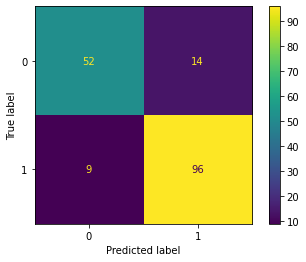

In [52]:
plot_confusion_matrix(grid_model2,X_test,y_test)

This new model trained on 10 principal components slightly outperforms the one trained on 2 above (23 misclassified points versus 29 and an accuracy of 87% versus 83%)

### Thank you for making it this far. 